# 6.2 Exploring Relationships

## This notebook contains the following contents

## 01 Importing necessary libraries and data

## 02. Consistency checks & Data wrangling

## 03. Exploring relationships

### 03.1 Corelations
### 03.2 Scatterplots
### 03.3 Pair plots
### 03.4 Categorical plots

## 04. Revisiting previously defined questions and hypothesis

# 01 Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.9.2'

In [3]:
# defining path
path = r'C:\Users\hiron\Documents\191124_FIFA22_analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Derived Data', 'FIFA22_cleaned.csv'), index_col = False)

# 02. Consistency checks & Data wrangling

In [8]:
# Since the dataset contains >100 columns, we need to make sure we can see them all

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
pd.set_option('display.max_rows', None)

In [9]:
df.dtypes

sofifa_id                        int64
short_name                      object
long_name                       object
player_positions                object
overall                          int64
potential                        int64
value_eur                      float64
wage_eur                       float64
age                              int64
dob                             object
height_cm                        int64
weight_kg                        int64
club_team_id                   float64
club_name                       object
league_name                     object
league_country                  object
league_level                   float64
club_position                   object
club_jersey_number             float64
club_loaned_from                object
club_joined                     object
club_contract_valid_until      float64
nationality_id                   int64
nationality_name                object
preferred_foot                  object
weak_foot                

In [10]:
# for the purpose of exploring relationships, we need numerical columns only

In [21]:
dfn = df.select_dtypes(include=['int', 'float'])

In [22]:
# we will not need sofifa_id and goalkeeping_speed, league_level,club_contract_valid_until,nationality_id',release_clause_eur
dfn = dfn.drop(columns=['sofifa_id','league_level','goalkeeping_speed','nationality_id','club_contract_valid_until','release_clause_eur'])

In [23]:
# find columns with mixed data types
mixed_columns = [col for col in dfn.columns if dfn[col].map(type).nunique() > 1]

# Print the result
print("Columns with mixed data types:", mixed_columns)

Columns with mixed data types: []


In [16]:
# We have no mixed data types

In [24]:
dfn.shape

(19238, 52)

# 03. Exploring relationships

## 03.1 Corelations

In [25]:
# Create a correlation matrix using pandas

dfn.corr()

overall  potential  value_eur  wage_eur  \
overall                      1.000000   0.644189   0.554684  0.601764   
potential                    0.644189   1.000000   0.527738  0.497611   
value_eur                    0.554684   0.527738   1.000000  0.823527   
wage_eur                     0.601764   0.497611   0.823527  1.000000   
age                          0.459364  -0.264328   0.042886  0.158490   
height_cm                    0.042705   0.004334   0.010291  0.028062   
weight_kg                    0.150239  -0.017002   0.035188  0.066208   
club_team_id                -0.226640  -0.330928  -0.191468 -0.240514   
club_jersey_number          -0.186166   0.009784  -0.067670 -0.069797   
weak_foot                    0.223788   0.157061   0.149757  0.160240   
skill_moves                  0.376349   0.283822   0.257232  0.272319   
international_reputation     0.470377   0.357041   0.632181  0.675637   
pace                         0.174869   0.258958   0.181934  0.134479   
shooting                     0.489686   0.287872   0.290294  0.312219   
passing                      0.714981   0.437580   0.404774  0.438336   
dribbling                    0.666462   0.490275   0.404812  0.421867   
defending                    0.346558   0.161950   0.147359  0.178856   
physic                       0.529173   0.155623   0.215105  0.249843   
attacking_crossing           0.401324   0.243703   0.227414  0.253123   
attacking_finishing          0.338807   0.230841   0.217691  0.229687   
attacking_heading_accuracy   0.343762   0.192687   0.165921  0.207326   
attacking_short_passing      0.516730   0.367086   0.297419  0.324420   
attacking_volleys            0.381038   0.235816   0.238366  0.264481   
skill_dribbling              0.384371   0.311394   0.240916  0.255204   
skill_curve                  0.420387   0.270161   0.252820  0.281428   
skill_fk_accuracy            0.380975   0.207696   0.214721  0.245725   
skill_long_passing           0.498100   0.324663   0.278721  0.310768   
skill_ball_control           0.460369   0.347115   0.269854  0.293376   
movement_acceleration        0.194161   0.232712   0.157690  0.133496   
movement_sprint_speed        0.205811   0.235633   0.164682  0.142775   
movement_agility             0.270410   0.223475   0.176597  0.171261   
movement_reactions           0.871780   0.522362   0.492741  0.539616   
movement_balance             0.123739   0.136919   0.117887  0.105672   
power_shot_power             0.561106   0.332189   0.301723  0.344529   
power_jumping                0.284575   0.096871   0.118294  0.148923   
power_stamina                0.385115   0.199685   0.198771  0.199667   
power_strength               0.364311   0.073479   0.128684  0.162081   
power_long_shots             0.410004   0.243261   0.231585  0.257850   
mentality_aggression         0.400066   0.191389   0.183251  0.225225   
mentality_interceptions      0.316308   0.157569   0.141060  0.170430   
mentality_positioning        0.358609   0.233085   0.224097  0.240612   
mentality_vision             0.523038   0.345276   0.324453  0.347141   
mentality_penalties          0.343666   0.208019   0.196231  0.228939   
mentality_composure          0.708780   0.426657   0.389065  0.437174   
defending_marking_awareness  0.311916   0.161117   0.140981  0.169093   
defending_standing_tackle    0.259599   0.156491   0.120724  0.144442   
defending_sliding_tackle     0.233409   0.140708   0.103512  0.125646   
goalkeeping_diving          -0.010989  -0.043095  -0.022090 -0.024234   
goalkeeping_handling        -0.011003  -0.044932  -0.022474 -0.024443   
goalkeeping_kicking         -0.012972  -0.047022  -0.021599 -0.024328   
goalkeeping_positioning     -0.002484  -0.040187  -0.021292 -0.022675   
goalkeeping_reflexes        -0.007943  -0.042373  -0.019929 -0.022762   

                                  age  height_cm  weight_kg  club_team_id  \
overall                      0.459364   0.042705   0.150239     -0.226640   
potent

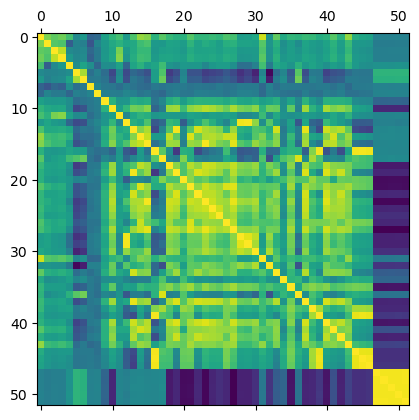

In [26]:
#Now, we use the above data to create a correlation heatmap using matplotlib

plt.matshow(dfn.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

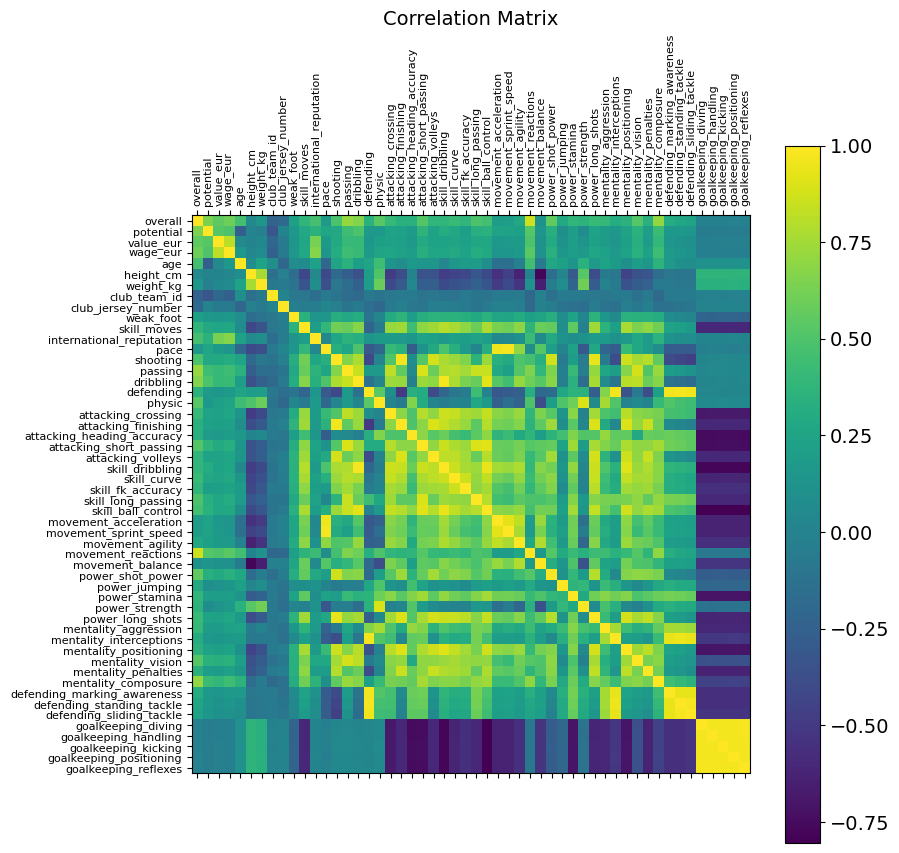

In [29]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(9, 9)) # figure size 
plt.matshow(dfn.corr(), fignum=f.number) # type of plot
plt.xticks(range(dfn.shape[1]), dfn.columns, fontsize=8, rotation=90) # x axis labels
plt.yticks(range(dfn.shape[1]), dfn.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Since we have around 50 numerical columns to corelate, it is difficult to read much from the graph but what is important to keep in mind at this stage is the lighter the colour, the stronger the corelation is.

### For example , we can already see strong corelation between different attributes of skill and same for attacking

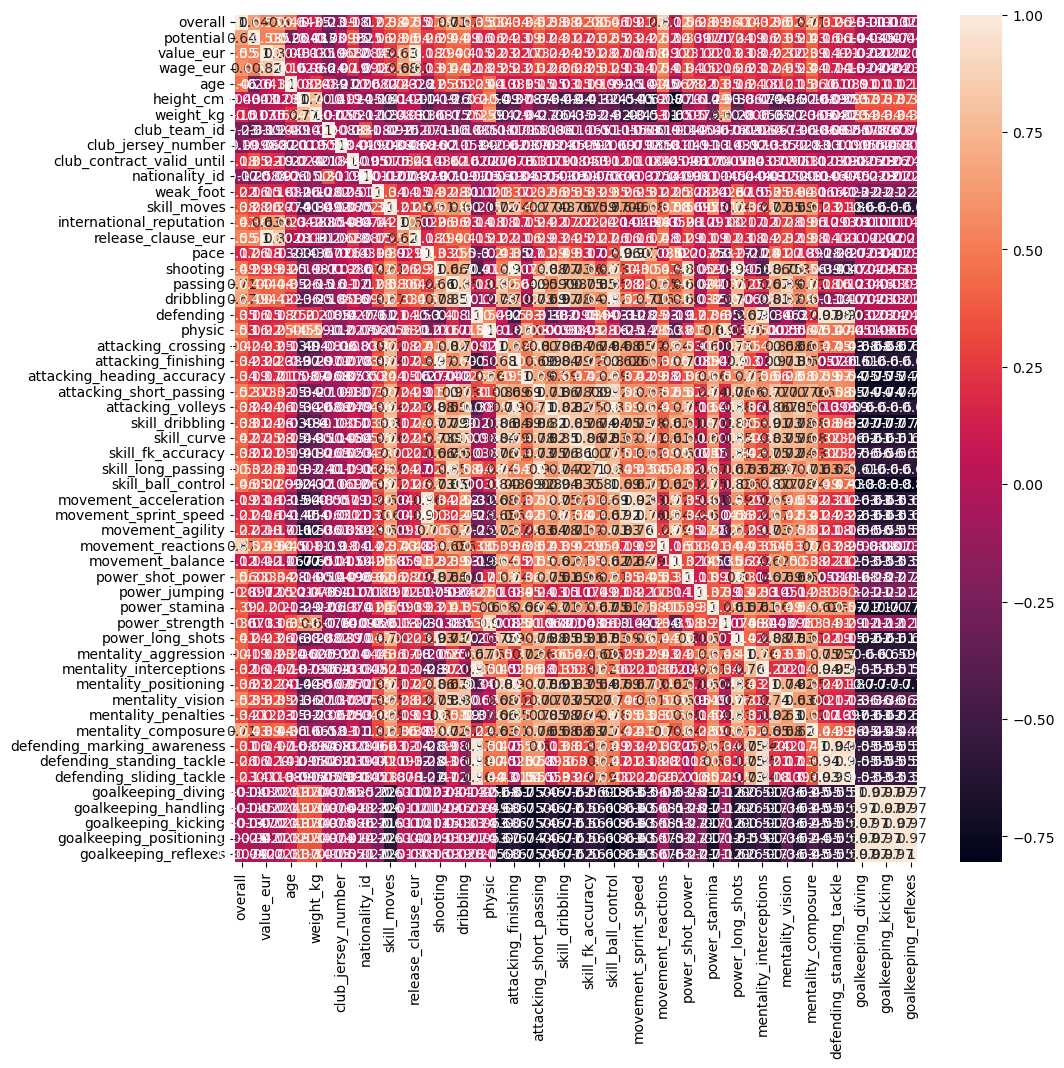

In [30]:
#Now we create a subplot with matplotlib
f,ax = plt.subplots(figsize=(11,11))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numerical_columns.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Again, does not make much sense for us right now due to sheer volume of columns

## 03.2 Scatterplots

### We beleived a player value ( value_eur ) is ideally strongly corelated to their overall as well as their potential , so we will test those

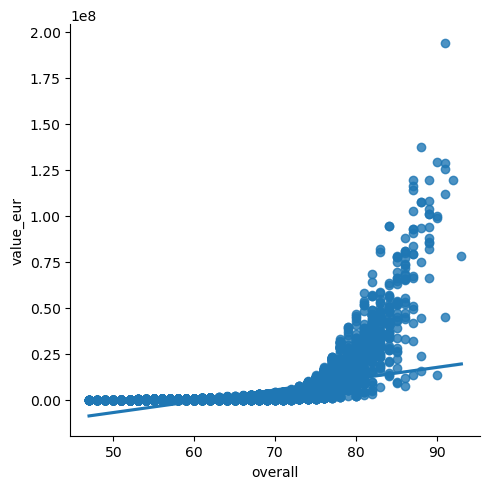

In [31]:
## Create a scatterplot for the "overall" and "value_eur" columns in seaborn
sns.lmplot(x = 'overall', y = 'value_eur', data = dfn)

### Here we can see that after the overakll increases beyond 75 of the player, the value increases non linearly after each point increase in overall which could mean that we should scout players around the 70 mark and then develop them

## 03.3 Pair Plots

### We will use the following columns : overall,potential,value_eur,wage_eur,skill_moves,physic,passing

In [34]:
sub = dfn[['overall', 'potential', 'value_eur', 'wage_eur','skill_moves','physic','passing']]

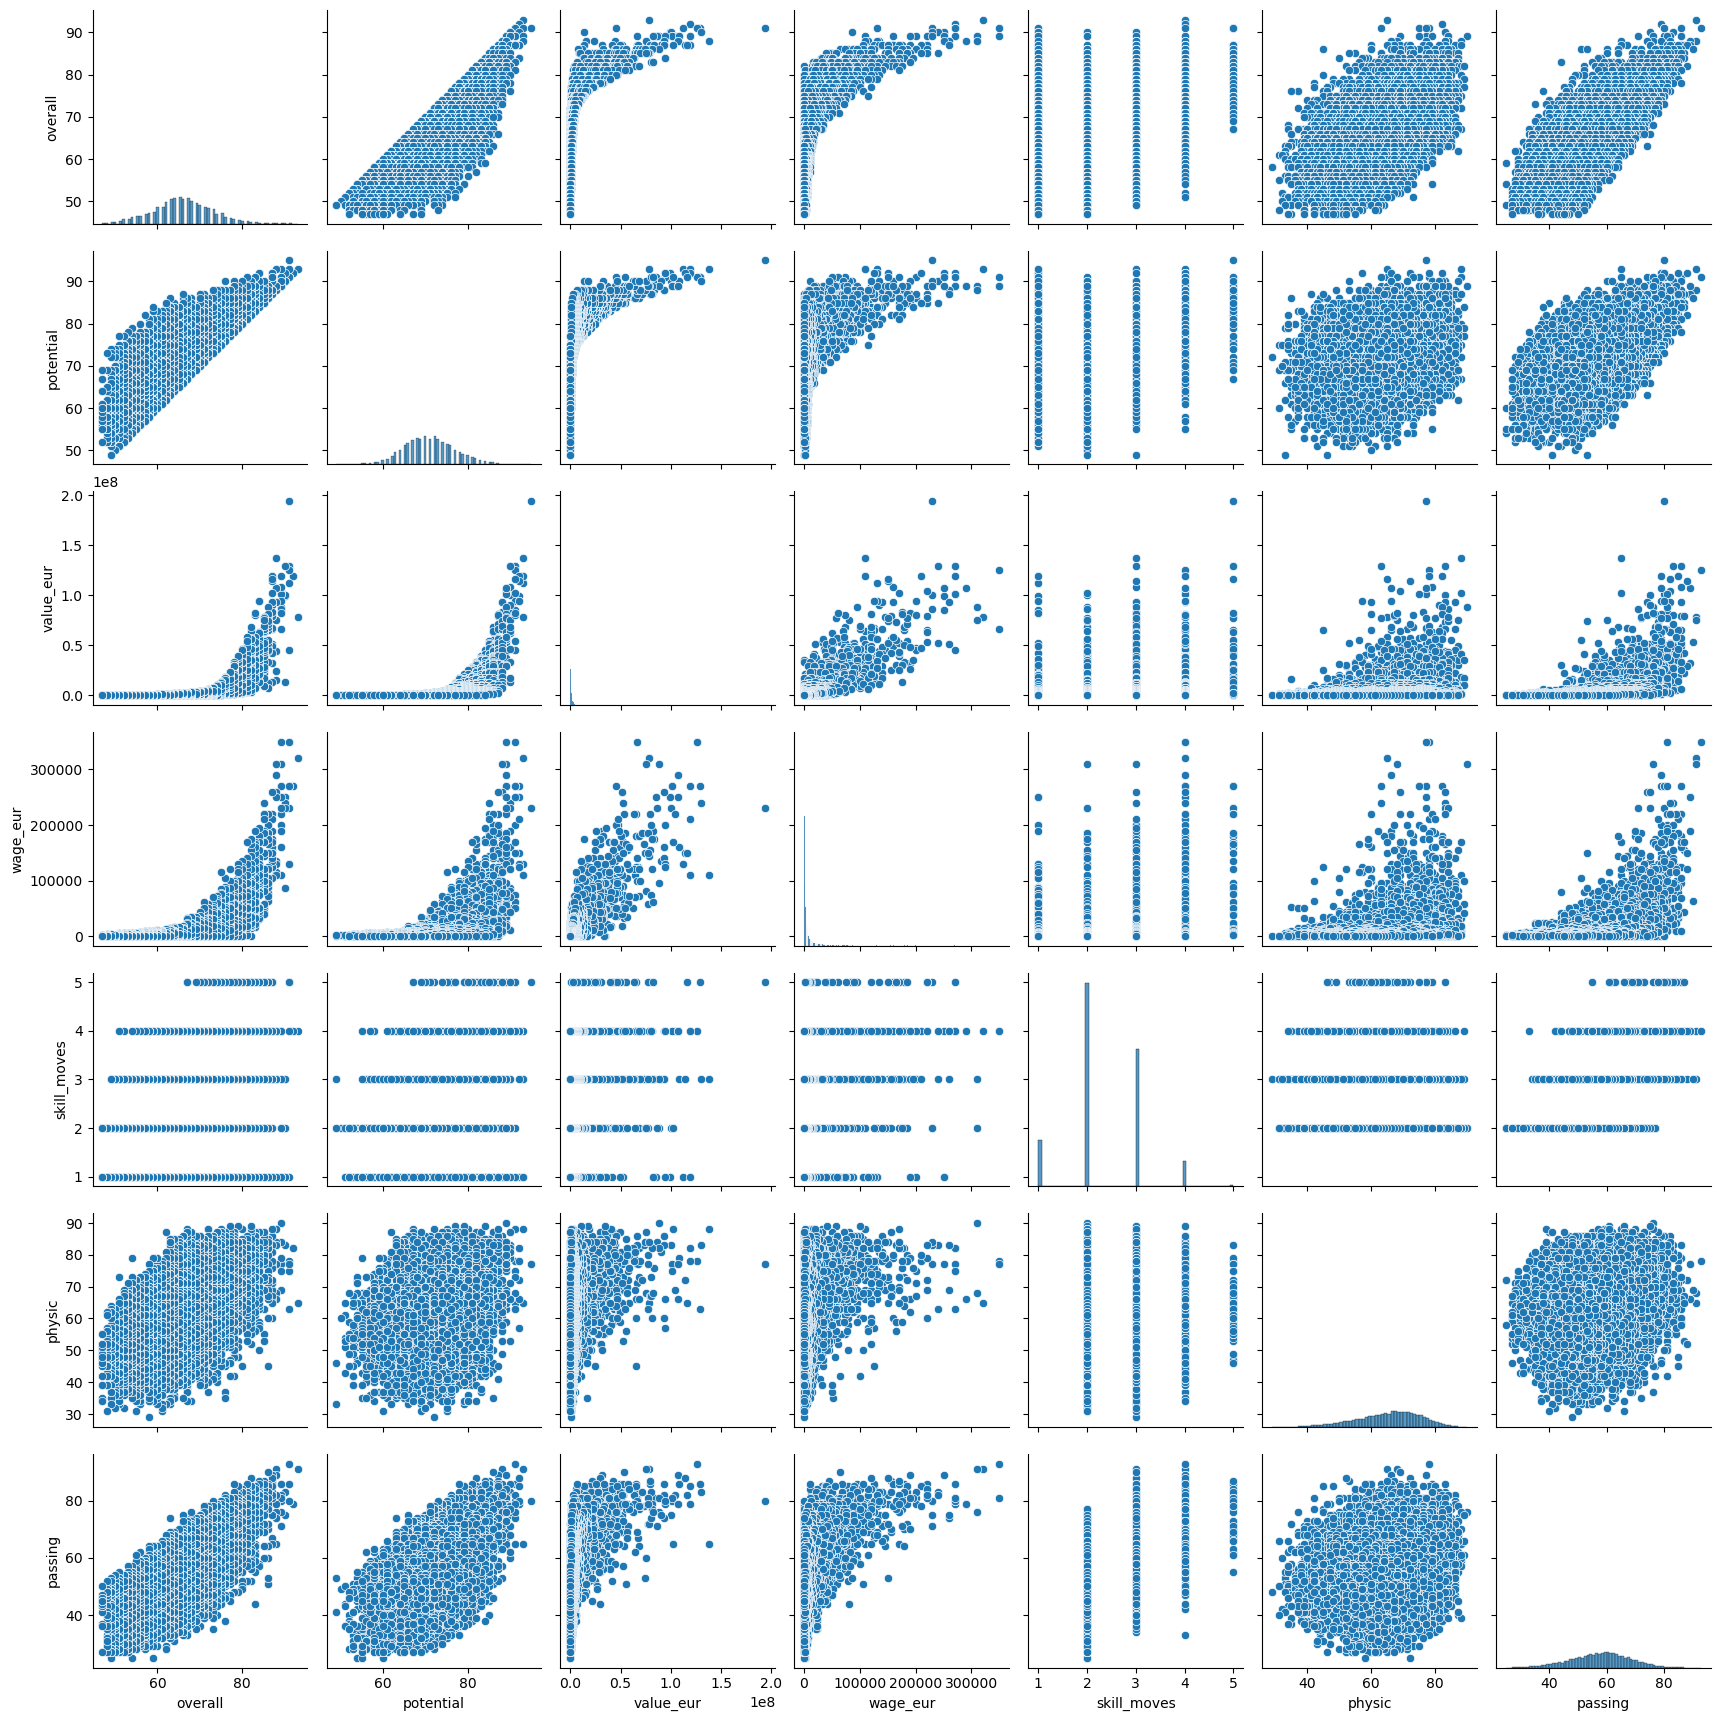

In [33]:
# Create a pair plot 

g = sns.pairplot(sub)

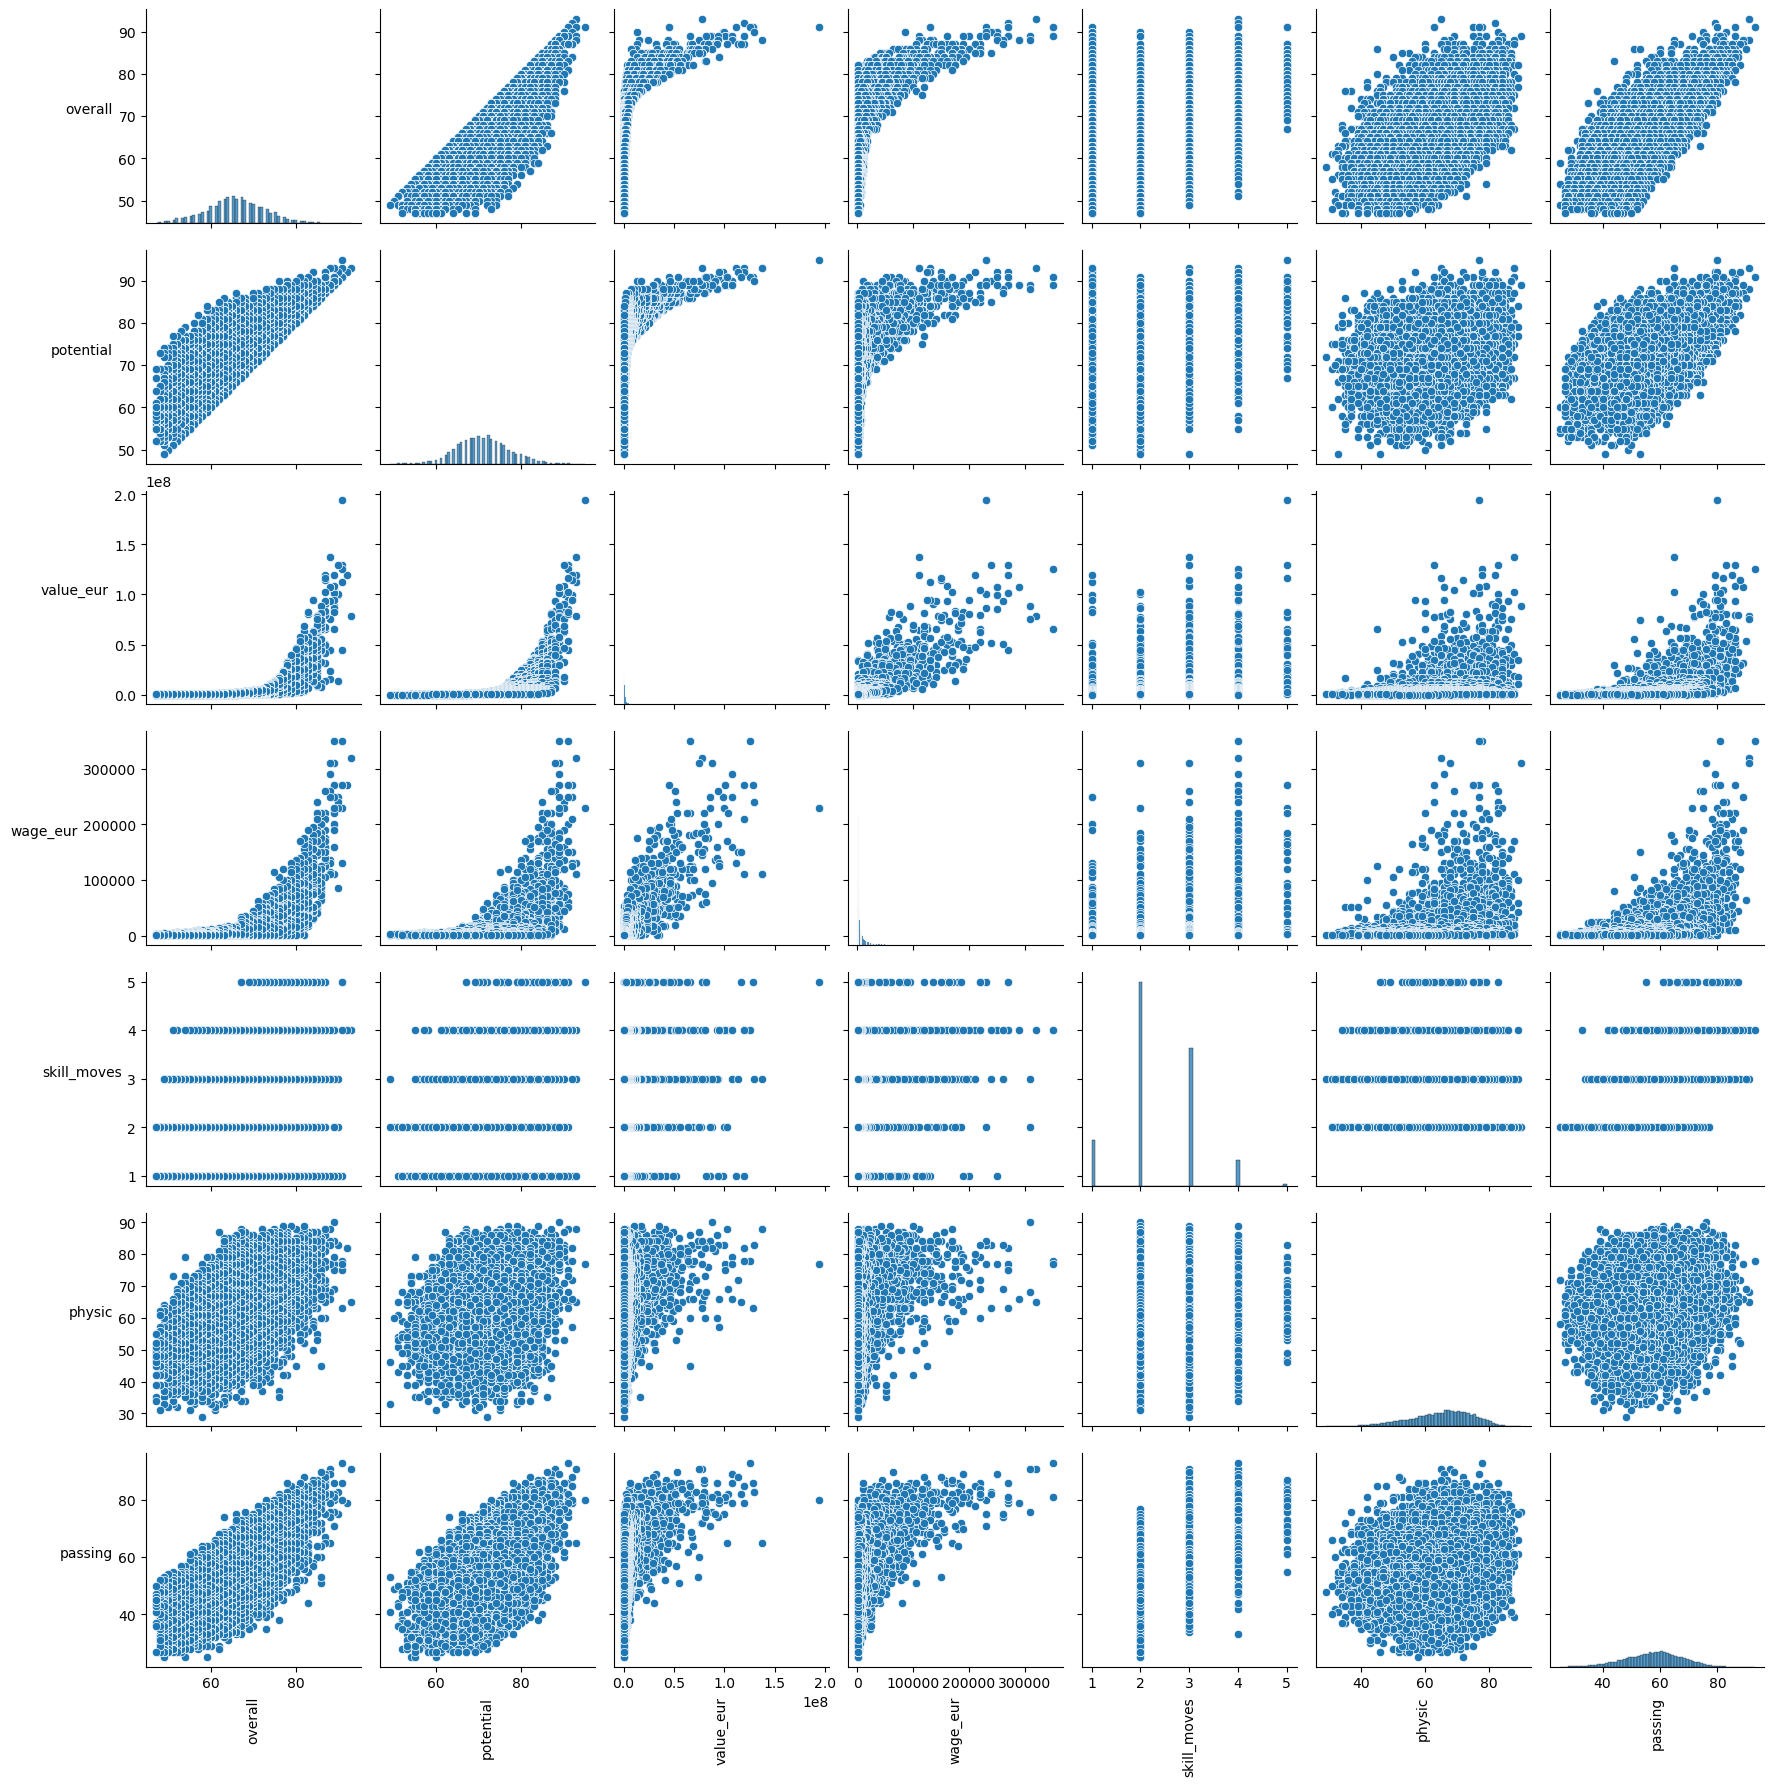

In [36]:
labels=['overall', 'potential', 'value_eur', 'wage_eur','skill_moves','physic','passing']
x=sns.pairplot(sub)
for ax in x.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

### It is difficult to read too much into each scatterplot but we can alrady see to a certain degree that all the other factors that we chose corelate on a certain level with overall and value_eur

## 03.4 Categorical plots

### Since we are mostly interested in player who are either already very good or can be developed from a decent level to high calibre, we will look at players >55 Overall and potential > 70 and divide them into categories

In [37]:
# Filtering the dataset to include these layers

In [40]:
filtered_df = dfn[dfn['overall']>=55]

In [41]:
fil_df = filtered_df[filtered_df['potential']>70]

<Axes: xlabel='overall', ylabel='Count'>

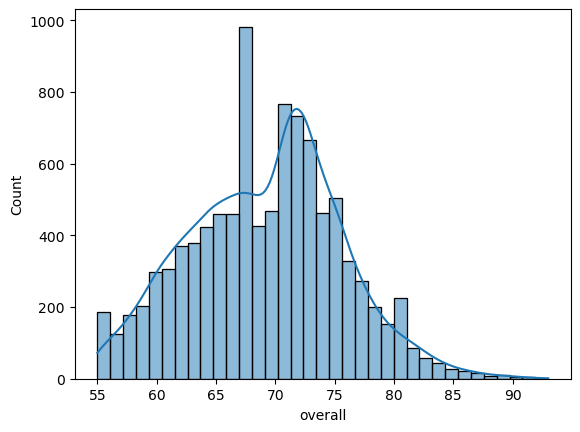

In [45]:
# plotting on histogram
sns.histplot(fil_df['overall'], bins = 35, kde = True)

<Axes: xlabel='potential', ylabel='Count'>

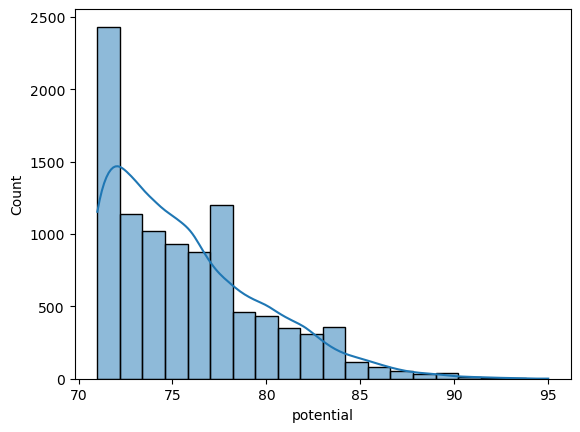

In [46]:
# plotting on histogram
sns.histplot(fil_df['potential'], bins = 20, kde = True)

### Based on histogram for potential, we will divide it into 3 categories : 70-80 ( showing great potential ) , 80-87 ( exciting prospect ), 87-95 ( Potential to be special )

In [48]:
fil_df.loc[fil_df['potential'] < 80, 'Player category'] = 'Showing great potential'

In [51]:
fil_df.loc[(fil_df['potential']>= 80) & (fil_df['potential']< 87), 'Player category']='Exciting prospect'

In [52]:
fil_df.loc[fil_df['potential'] > 87, 'Player category'] = 'Potential to be special'

In [54]:
fil_df['Player category'].value_counts()

Player category
Showing great potential    8062
Exciting prospect          1645
Potential to be special      95
Name: count, dtype: int64

In [55]:
fil_df.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_team_id', 'club_jersey_number', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
   

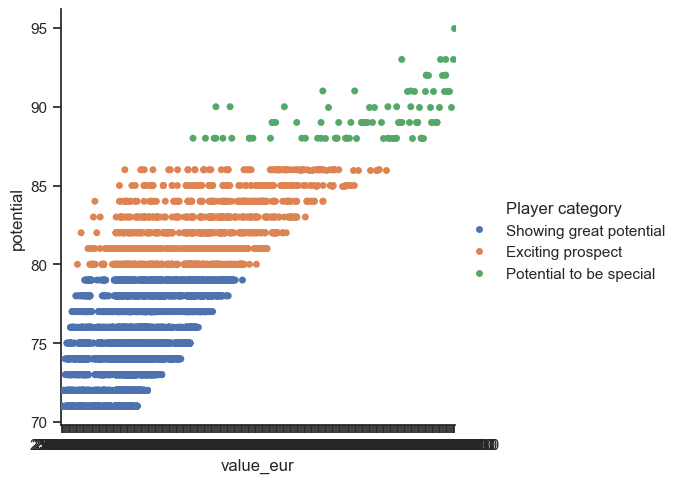

In [58]:
# Create a categorical plot in seaborn using the price categories created above

sns.set_theme(style="ticks")
g = sns.catplot(x="value_eur", y="potential", hue="Player category", data=fil_df)

### The black line at the bottom of our plot, where value_eur is located, is likely caused by overlapping data points that have the same or very close values for value_eur. This can happen when multiple data points share the same x value, and Seaborn's catplot (with default settings) does not spread them out horizontally, causing them to overlap and appear as a solid line.

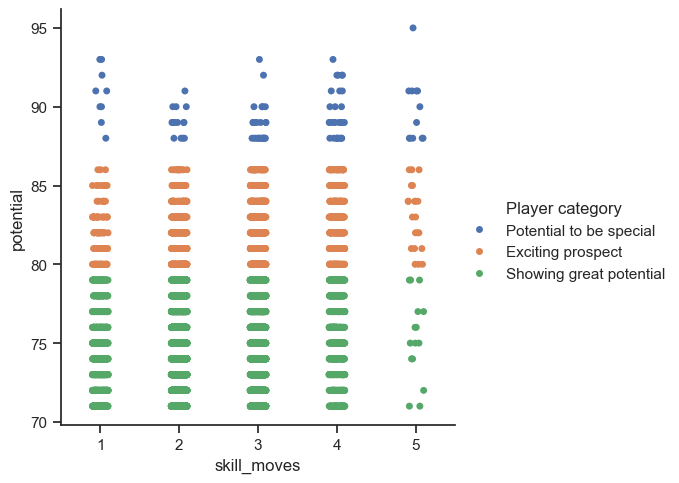

In [59]:
# Create a categorical plot in seaborn using the price categories created above

sns.set_theme(style="ticks")
g = sns.catplot(x="skill_moves", y="potential", hue="Player category", data=fil_df)

### We can see from this that the high potential players ( potential to be special ) have generally high skill_moves compared to lower potential players especiall for 5 star skill_moves

# 04. Revisiting previously defined questions and hypothesis

### Since we learnt establishing relationships between numerical columns in this phase, we will focus on numerical column questions below

## 04.1 Are physical attributes at young age strong predictors of senior success? if so, for what positions ?
## We will use potential as predictor of success and compare potential of players ( aged <20 ) with their physic ratings

In [60]:
# Creating a subset of players aged less than 20
dfn_young=dfn[dfn['age']<=20]

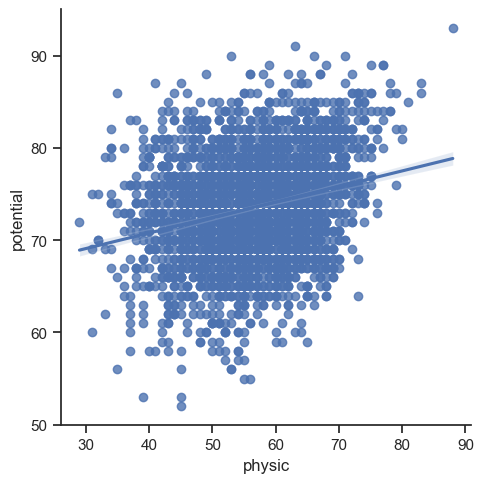

In [61]:
## Create a scatterplot for the "potential" and "physic" columns in seaborn
sns.lmplot(x = 'physic', y = 'potential', data = dfn_young)

### Answer  : The correlation is extremely weak (close to 0), meaning there's almost no linear relationship between "physic" and "potential."### 
The p-value is very high (0.950), indicating that this correlation is not statistically significant. In other words, if there is any relationship  it could be due to random chance.

## 04.2 What are the top 5 most valuable football leagues

## We will assume the value of the league is the combined sum of all player values playing in that league

In [64]:
# Ensure the value_eur column is numeric
df['value_eur'] = pd.to_numeric(df['value_eur'], errors='coerce')

# Group by league and calculate the total player value per league
league_values = df.groupby('league_name')['value_eur'].sum().sort_values(ascending=False)

# Get the top 5 most valuable leagues
top_5_leagues = league_values.head(5)

# Display the result
print("Top 5 Most Valuable Leagues:")
print(top_5_leagues)

Top 5 Most Valuable Leagues:
league_name
English Premier League    9.148980e+09
Spain Primera Division    7.282200e+09
Italian Serie A           5.308695e+09
German 1. Bundesliga      4.763380e+09
French Ligue 1            4.239495e+09
Name: value_eur, dtype: float64


### Answer : The above table shows the list of top 5 leagues and their values in terms of sum of player values

## To look at other questions and aswer them effectively , we will need to look at more than relationship graphs which we will learn later